                                                  X0              X1     X2  \
0                                Coloring book moana  ART_AND_DESIGN    967   
1  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN  87510   
2              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    967   
3                         Paper flowers instructions  ART_AND_DESIGN    167   
4            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN    178   

     X3          X4    X5 X6        X7                         X8  \
0   14M    500,000+  Free  0  Everyone  Art & Design;Pretend Play   
1  8.7M  5,000,000+  Free  0  Everyone               Art & Design   
2  2.8M    100,000+  Free  0  Everyone    Art & Design;Creativity   
3  5.6M     50,000+  Free  0  Everyone               Art & Design   
4   19M     50,000+  Free  0  Everyone               Art & Design   

                 X9    X10           X11    Y  
0  January 15, 2018  2.0.0  4.0.3 and up  3.9  
1    August 1,

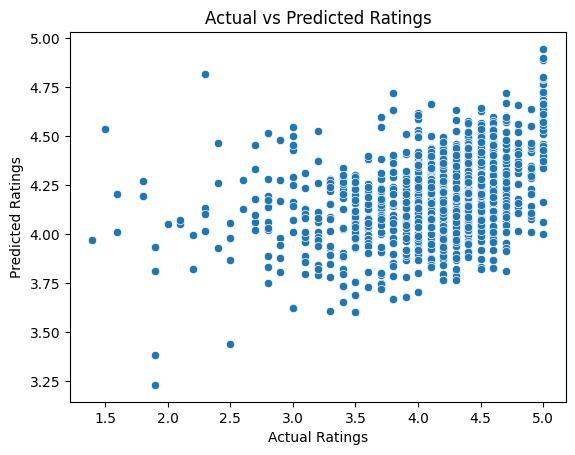

In [ ]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, LassoCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/train.csv')
test_data = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/test.csv')

# Data exploration
print(train_data.head())
print(train_data.describe())
print(train_data.isnull().sum())

# Data preprocessing
# Convert non-numerical columns to numerical using one-hot encoding
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

# Handle missing values in the target variable
train_data = train_data.dropna(subset=['Y'])

# Feature selection
X = train_data.drop(['Y'], axis=1)
y = train_data['Y']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': LassoCV(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_val)
    print(f"{name} - MAE: {mean_absolute_error(y_val, y_pred)}, MSE: {mean_squared_error(y_val, y_pred)}, R^2: {r2_score(y_val, y_pred)}")

# Visualization of predictions
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()